In [2]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 8)

## 1. Linear Regression

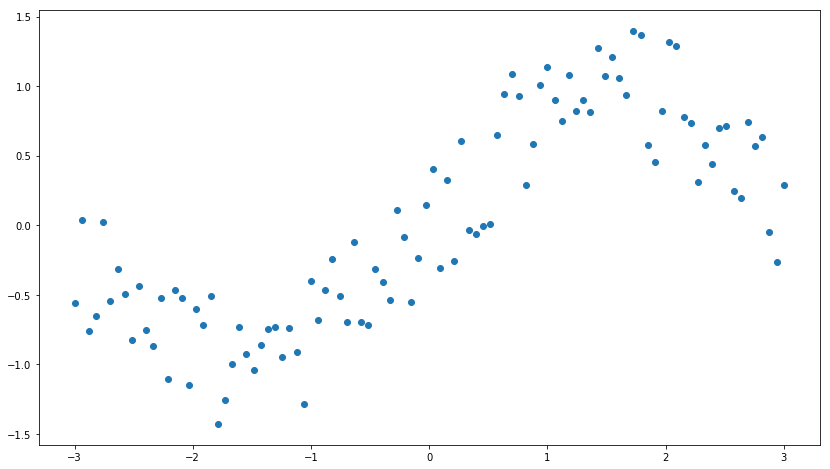

In [3]:
n_observations = 100
xs = np.linspace(-3, 3, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.scatter(xs, ys)
plt.show()

### 1.1 placeholder

In [4]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')


### 1.2 init parameters/weights

In [5]:
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

### 1.3 predict

In [6]:
Y_pred = tf.add(tf.multiply(X, W), b)

### 1.4 loss function

In [7]:
loss = tf.square(Y - Y_pred, name='loss')

### 1.5 init optimizer

In [8]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

### 1.6 iter times, run graph

In [9]:
n_samples = xs.shape[0]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
    
    for i in range(50):
        total_loss = 0
        for x, y in zip(xs, ys):
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y: y})
            total_loss += l
        if i%5 == 0:
            print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
            
    writer.close()
    
    W, b = sess.run([W, b])
        

Epoch 0: [ 0.71460897]
Epoch 5: [ 0.17909123]
Epoch 10: [ 0.17909493]
Epoch 15: [ 0.17909493]
Epoch 20: [ 0.17909493]
Epoch 25: [ 0.17909493]
Epoch 30: [ 0.17909493]
Epoch 35: [ 0.17909493]
Epoch 40: [ 0.17909493]
Epoch 45: [ 0.17909493]


In [10]:
print(W, b)
print("W:" + str(W[0]))
print("b:" + str(b[0]))

(array([ 0.19350752], dtype=float32), array([-0.14788285], dtype=float32))
W:0.193508
b:-0.147883


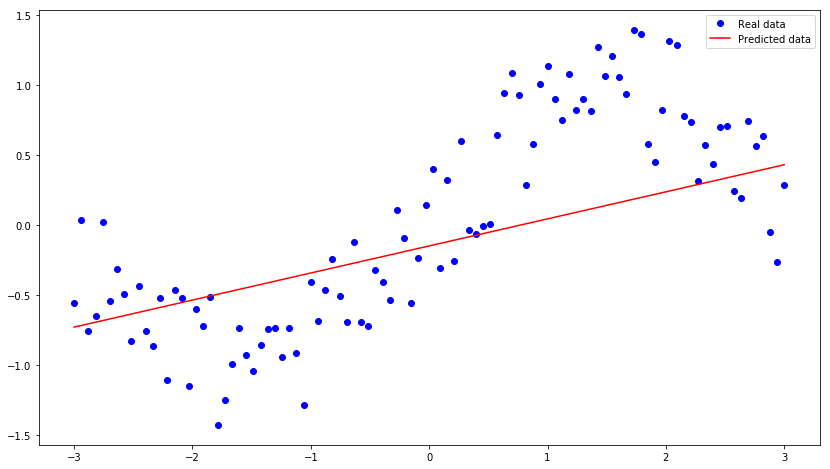

In [11]:
plt.plot(xs, ys, 'bo', label='Real data')
plt.plot(xs, xs * W + b, 'r', label="Predicted data")
plt.legend()
plt.show()

## 2. polynomial regression

### 2.1 preparation

In [12]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

### 2.2 predict

In [13]:
Y_pred = tf.add(tf.multiply(X, W), b)
# add high order term
W_2 = tf.Variable(tf.random_normal([1]), name='weight_2')
Y_pred = tf.add(tf.multiply(tf.pow(X, 2), W_2), Y_pred)
W_3 = tf.Variable(tf.random_normal([1]), name='weight_3')
Y_pred = tf.add(tf.multiply(tf.pow(X, 3), W_3), Y_pred)

### 2.3 loss function

In [14]:
sample_num = xs.shape[0]
loss = tf.reduce_sum(tf.pow(Y_pred - Y, 2)) / sample_num

### 2.4 init optimizer

In [15]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

### 2.5 set step, run graph in session

In [18]:
n_samples = xs.shape[0]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('./graphs/polynomial_reg', sess.graph)
    # train model
    for i in range(1000):
        total_loss = 0
        for x, y in zip(xs, ys):
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y: y})
            total_loss += l
        if i%20 == 0:
            print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
            
    # close writer
    writer.close()
    # get w and b
    W, W_2, W_3, b = sess.run([W, W_2, W_3, b])

Epoch 0: 0.779829822248
Epoch 20: 0.0160513635707
Epoch 40: 0.0112228440795
Epoch 60: 0.00792550128691
Epoch 80: 0.00567674347393
Epoch 100: 0.00414327452183
Epoch 120: 0.00309770096234
Epoch 140: 0.00238488938403
Epoch 160: 0.00189901084214
Epoch 180: 0.00156787921139
Epoch 200: 0.0013422642162
Epoch 220: 0.00118857606011
Epoch 240: 0.001083920137
Epoch 260: 0.00101267957091
Epoch 280: 0.000964208672382
Epoch 300: 0.000931250901077
Epoch 320: 0.000908855759432
Epoch 340: 0.00089365277141
Epoch 360: 0.000883344803554
Epoch 380: 0.000876365563479
Epoch 400: 0.00087164843353
Epoch 420: 0.00086846764897
Epoch 440: 0.00086633007077
Epoch 460: 0.000864898512304
Epoch 480: 0.000863944395967
Epoch 500: 0.000863312807465
Epoch 520: 0.00086289869924
Epoch 540: 0.000862629898863
Epoch 560: 0.000862458429241
Epoch 580: 0.000862351404872
Epoch 600: 0.000862286911676
Epoch 620: 0.000862250107573
Epoch 640: 0.000862230984743
Epoch 660: 0.00086222340672
Epoch 680: 0.000862222645774
Epoch 700: 0.00086

In [19]:
print("W:" + str(W[0]))
print("W_2" + str(W_2[0]))
print("W_3" + str(W_3[0]))
print("b:" + str(b[0]))

W:0.822684
W_2-0.00441283
W_3-0.0910465
b:0.0342634


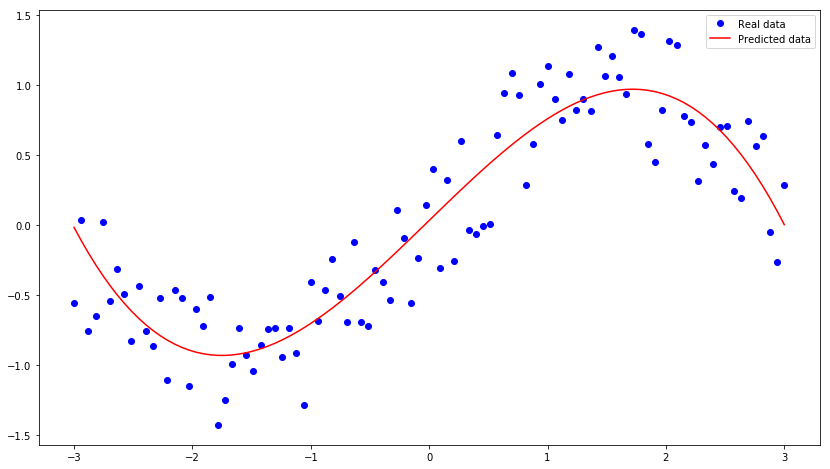

In [20]:
plt.plot(xs, ys, 'bo', label='Real data')
plt.plot(xs, xs*W + np.power(xs, 2)*W_2 + np.power(xs, 3)*W_3 + b, 'r', label='Predicted data')
plt.legend()
plt.show()

# 3 logistic regression

### 3.1 env setup

In [21]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import time

### 3.2 read data 

In [22]:
# load MNIST data using tensorflow exmaple
mnist = input_data.read_data_sets('.data/mnist', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ../../data/mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ../../data/mnist/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ../../data/mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ../../data/mnist/t10k-labels-idx1-ubyte.gz
